In [1]:
import nltk
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import re
from nltk.stem import PorterStemmer
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

stemmer = PorterStemmer()

### Import and load the data file

In [2]:
with open('intents.json', 'r') as f:
    intents = json.load(f)

### Preprocessing

In [3]:
training_sentences = []
labels = []

doc_0 = []
doc_1 = []

In [4]:
# functions

def tokenize(sentence):
    token = nltk.word_tokenize(sentence)
    return token

def remove_punctuations(sentence):
    # remove punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    
    text_alpha_chars = ""
    for char in sentence:
        if char not in punctuations:
            text_alpha_chars = text_alpha_chars + char
            
     # convert to lower-case
    text_lower = text_alpha_chars.lower()
    
    return text_lower

def stem(word):
    return stemmer.stem(word)

In [5]:
# getting all the data to lists
tags = []
patterns = []

for intent in intents['intents']:
    label = intent['tag']
    labels.append(label)
    for sentences in intent['patterns']:
        patterns.append(sentences)
        tags.append(intent['tag'])

In [6]:
#converting to dataframe
df = pd.DataFrame({"patterns":patterns,
                     "tags":tags})
df

,patterns,tags
0,Hi,greetings
1,Hey,greetings
2,Hello,greetings
3,Hey there,greetings
4,Hello restaurant Taiwan,greetings
...,...,...
193,How big is the restaurant?,seats
194,How many seats,seats
195,seats,seats
196,,unknown


In [7]:
# patterns
for pattern in df['patterns']:
    # remove punctuations and lowercase
    sentence_without_punctuations = remove_punctuations(pattern)
    # stemming
    stemmed_word = stem(sentence_without_punctuations)
    # tokenizing
    word = tokenize(stemmed_word)
    training_sentences.extend(word)
    doc_0.append(word)

In [8]:
# tags
for tag in df['tags']:
    doc_1.append(tag)


In [9]:
training_sentences = sorted(set(training_sentences))

### Create training and test data

In [10]:
# create training data

training = []

# create an empty array for the output
output_empty = [0] * len(labels)

In [11]:

# creating bag of words 
for idx, doc in enumerate(doc_0):
    bow = []
    
    for word in training_sentences:
        
        bow.append(1) if word in doc else bow.append(0)
    
    output_row = list(output_empty)
   
    output_row[labels.index(doc_1[idx])] = 1
    
    # add one hot encoded bow and labels to training
    training.append([bow, output_row])


# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)

# split the features and target labels
X_train = list(training[:,0])
y_train = list(training[:,1])

X = X_train
y = y_train



### Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build the model

### Multilayer Perceptrons (MLP)

#### model 1

In [14]:
model1 = Sequential()
model1.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model1.add(Dense(64, activation='relu'))

model1.add(Dense(len(y_train[0]), activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

fit1 = model1.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=8, verbose=1, validation_data=(X_test, y_test))



Epoch 1/200
20/20 [==============================] - 0s 10ms/step - loss: 3.1789 - accuracy: 0.1899 - val_loss: 3.1574 - val_accuracy: 0.2250
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 2.9590 - accuracy: 0.2595 - val_loss: 3.0086 - val_accuracy: 0.2000
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 2.6689 - accuracy: 0.2532 - val_loss: 2.8385 - val_accuracy: 0.2000
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 2.4058 - accuracy: 0.2532 - val_loss: 2.7112 - val_accuracy: 0.2500
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 2.2048 - accuracy: 0.3101 - val_loss: 2.6184 - val_accuracy: 0.2500
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 2.0138 - accuracy: 0.3987 - val_loss: 2.5019 - val_accuracy: 0.2500
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 1.8255 - accuracy: 0.5000 - val_loss: 2.3922 - val_accuracy: 0.3250
Epoch 8/200


Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9873 - val_loss: 0.8358 - val_accuracy: 0.7250
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.8332 - val_accuracy: 0.7250
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9873 - val_loss: 0.8316 - val_accuracy: 0.7250
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9873 - val_loss: 0.8296 - val_accuracy: 0.7250
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9937 - val_loss: 0.8494 - val_accuracy: 0.7250
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9937 - val_loss: 0.8420 - val_accuracy: 0.7250
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9937 - val_loss: 0.8437 - val_accuracy: 0.7250
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9873 - val_loss: 1.1012 - val_accuracy: 0.7250
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9873 - val_loss: 1.1117 - val_accuracy: 0.7250
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9937 - val_loss: 1.1256 - val_accuracy: 0.7250
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9873 - val_loss: 1.1238 - val_accuracy: 0.7250
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9937 - val_loss: 1.1291 - val_accuracy: 0.7500
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9937 - val_loss: 1.1268 - val_accuracy: 0.7500
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9937 - val_loss: 1.1190 - val_accuracy: 0.7250
Epoch 180/200

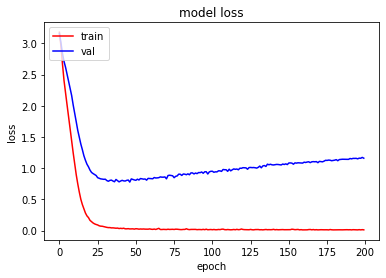

In [15]:
plt.plot(fit1.history['loss'], 'r')
plt.plot(fit1.history['val_loss'], 'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show() 

### Regularisation

We have a pretty decent basic model. But, let's try to improve our model. We could use three strategies:
  1. Adding drop-out and batch normalization
  2. Babysitting method

#### model 2 with drop-out

In [19]:
from keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(len(y_train[0]), activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

fit2 = model2.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=8, verbose=1, validation_data=(X_test, y_test))


Epoch 1/200
20/20 [==============================] - 0s 9ms/step - loss: 3.2082 - accuracy: 0.1013 - val_loss: 3.1984 - val_accuracy: 0.1750
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 3.0529 - accuracy: 0.2595 - val_loss: 3.0999 - val_accuracy: 0.2000
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 2.8474 - accuracy: 0.2595 - val_loss: 2.9711 - val_accuracy: 0.2000
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 2.6405 - accuracy: 0.2595 - val_loss: 2.8514 - val_accuracy: 0.2000
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 2.4862 - accuracy: 0.2532 - val_loss: 2.7749 - val_accuracy: 0.2000
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 2.3656 - accuracy: 0.2848 - val_loss: 2.7216 - val_accuracy: 0.2250
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 2.2753 - accuracy: 0.2911 - val_loss: 2.6594 - val_accuracy: 0.2250
Epoch 8/200
2

Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9873 - val_loss: 0.6859 - val_accuracy: 0.8250
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9937 - val_loss: 0.6677 - val_accuracy: 0.8250
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9873 - val_loss: 0.6650 - val_accuracy: 0.8250
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9937 - val_loss: 0.6556 - val_accuracy: 0.8000
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9873 - val_loss: 0.6729 - val_accuracy: 0.8250
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9873 - val_loss: 0.6790 - val_accuracy: 0.8250
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9873 - val_loss: 0.6884 - val_accuracy: 0.8250
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9937 - val_loss: 1.0077 - val_accuracy: 0.8000
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9937 - val_loss: 0.9638 - val_accuracy: 0.8000
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9937 - val_loss: 0.9058 - val_accuracy: 0.8250
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.8619 - val_accuracy: 0.8250
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9810 - val_loss: 0.9242 - val_accuracy: 0.8250
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 1.0025 - val_accuracy: 0.8000
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9873 - val_loss: 1.0401 - val_accuracy: 0.8000
Epoch 180/200

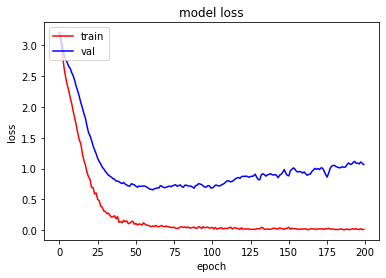

In [21]:
plt.plot(fit2.history['loss'], 'r')
plt.plot(fit2.history['val_loss'], 'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### model 3 with batch

In [22]:
from keras.callbacks import EarlyStopping


model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(len(X_train[0]),)))
model3.add(Dropout(0.3))
model3.add(BatchNormalization())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(BatchNormalization())

model3.add(Dense(len(y_train[0]), activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit3 = model3.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=8,verbose=1, validation_data=(X_test,y_test))

Epoch 1/200
20/20 [==============================] - 1s 10ms/step - loss: 3.8006 - accuracy: 0.0380 - val_loss: 3.2182 - val_accuracy: 0.1500
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 3.4251 - accuracy: 0.0823 - val_loss: 3.1798 - val_accuracy: 0.2000
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 3.2327 - accuracy: 0.1709 - val_loss: 3.1411 - val_accuracy: 0.2000
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 2.9242 - accuracy: 0.1962 - val_loss: 3.1014 - val_accuracy: 0.2500
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 2.6341 - accuracy: 0.2532 - val_loss: 3.0572 - val_accuracy: 0.2500
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 2.4263 - accuracy: 0.3038 - val_loss: 3.0065 - val_accuracy: 0.2750
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 2.2934 - accuracy: 0.3544 - val_loss: 2.9535 - val_accuracy: 0.3000
Epoch 8/200


Epoch 59/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.9430 - val_loss: 1.3408 - val_accuracy: 0.6250
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8924 - val_loss: 1.3032 - val_accuracy: 0.6250
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9557 - val_loss: 1.3006 - val_accuracy: 0.6250
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9430 - val_loss: 1.2903 - val_accuracy: 0.6250
Epoch 63/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9620 - val_loss: 1.2979 - val_accuracy: 0.6250
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9494 - val_loss: 1.3077 - val_accuracy: 0.6250
Epoch 65/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.9494 - val_loss: 1.2898 - val_accuracy: 0.6250
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9810 - val_loss: 0.9769 - val_accuracy: 0.7500
Epoch 174/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9430 - val_loss: 0.9865 - val_accuracy: 0.7500
Epoch 175/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1483 - accuracy: 0.9620 - val_loss: 0.9723 - val_accuracy: 0.7500
Epoch 176/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9430 - val_loss: 0.9531 - val_accuracy: 0.7500
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9620 - val_loss: 0.9094 - val_accuracy: 0.8000
Epoch 178/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.9810 - val_loss: 0.9105 - val_accuracy: 0.7750
Epoch 179/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9747 - val_loss: 0.9271 - val_accuracy: 0.7750
Epoch 180/200

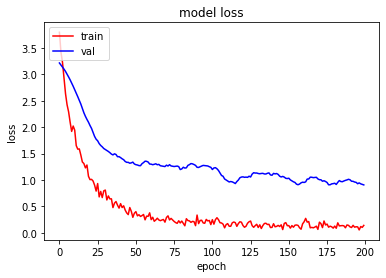

In [24]:
plt.plot(fit3.history['loss'], 'r')
plt.plot(fit3.history['val_loss'], 'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

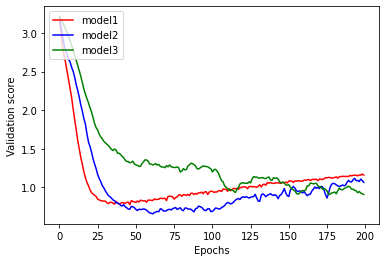

In [25]:
plt.plot(fit1.history['val_loss'], 'r', 
         fit2.history['val_loss'], 'b',
         fit3.history['val_loss'], 'g',)
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['model1', 'model2', 'model3'], loc='upper left')

plt.show()

### Babysitting

In [26]:
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_shape=(len(X_train[0]),)))
model4.add(Dropout(0.3))
model4.add(Dense(len(y_train[0]), activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit4 = model4.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/200
32/32 [==============================] - 0s 5ms/step - loss: 3.2189 - accuracy: 0.1013 - val_loss: 3.2047 - val_accuracy: 0.1500
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 3.0833 - accuracy: 0.2278 - val_loss: 3.1295 - val_accuracy: 0.2500
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 2.9428 - accuracy: 0.2975 - val_loss: 3.0430 - val_accuracy: 0.2250
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 2.7416 - accuracy: 0.3228 - val_loss: 2.9493 - val_accuracy: 0.2250
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 2.5702 - accuracy: 0.3418 - val_loss: 2.8477 - val_accuracy: 0.2250
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 2.4038 - accuracy: 0.3291 - val_loss: 2.7492 - val_accuracy: 0.2000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 2.2587 - accuracy: 0.3481 - val_loss: 2.6619 - val_accuracy: 0.2000
Epoch 8/200
3

Epoch 59/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9873 - val_loss: 0.7253 - val_accuracy: 0.8250
Epoch 60/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9873 - val_loss: 0.7245 - val_accuracy: 0.8250
Epoch 61/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9810 - val_loss: 0.7252 - val_accuracy: 0.8250
Epoch 62/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9937 - val_loss: 0.7242 - val_accuracy: 0.8250
Epoch 63/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9873 - val_loss: 0.7207 - val_accuracy: 0.8250
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9810 - val_loss: 0.7162 - val_accuracy: 0.8250
Epoch 65/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9937 - val_loss: 0.7155 - val_accuracy: 0.8250
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9873 - val_loss: 0.8534 - val_accuracy: 0.7250
Epoch 174/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.8582 - val_accuracy: 0.7250
Epoch 175/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9873 - val_loss: 0.8420 - val_accuracy: 0.7250
Epoch 176/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9873 - val_loss: 0.8563 - val_accuracy: 0.7250
Epoch 177/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9937 - val_loss: 0.8601 - val_accuracy: 0.7250
Epoch 178/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9937 - val_loss: 0.8634 - val_accuracy: 0.7250
Epoch 179/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.8829 - val_accuracy: 0.7250
Epoch 180/200

In [27]:

model5 = Sequential()
model5.add(Dense(128, activation='relu', input_shape=(len(X_train[0]),)))
model5.add(Dropout(0.3))
model5.add(Dense(len(y_train[0]), activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit5 = model5.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/200
32/32 [==============================] - 0s 5ms/step - loss: 3.1609 - accuracy: 0.1772 - val_loss: 3.1536 - val_accuracy: 0.2000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 2.9335 - accuracy: 0.2785 - val_loss: 3.0196 - val_accuracy: 0.2250
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 2.7000 - accuracy: 0.2911 - val_loss: 2.8779 - val_accuracy: 0.2000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 2.4302 - accuracy: 0.2911 - val_loss: 2.7470 - val_accuracy: 0.2000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 2.2198 - accuracy: 0.3101 - val_loss: 2.6321 - val_accuracy: 0.2000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 2.0595 - accuracy: 0.3924 - val_loss: 2.5430 - val_accuracy: 0.2500
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 1.9006 - accuracy: 0.4304 - val_loss: 2.4430 - val_accuracy: 0.2750
Epoch 8/200
3

Epoch 59/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9937 - val_loss: 0.6652 - val_accuracy: 0.7750
Epoch 60/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9873 - val_loss: 0.6739 - val_accuracy: 0.7750
Epoch 61/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9937 - val_loss: 0.6655 - val_accuracy: 0.7750
Epoch 62/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.6674 - val_accuracy: 0.7750
Epoch 63/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9937 - val_loss: 0.6675 - val_accuracy: 0.7750
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9937 - val_loss: 0.6710 - val_accuracy: 0.7750
Epoch 65/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9937 - val_loss: 0.6790 - val_accuracy: 0.7500
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9937 - val_loss: 0.9250 - val_accuracy: 0.7750
Epoch 174/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9873 - val_loss: 0.9191 - val_accuracy: 0.7750
Epoch 175/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9937 - val_loss: 0.9305 - val_accuracy: 0.7750
Epoch 176/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9873 - val_loss: 0.9325 - val_accuracy: 0.7750
Epoch 177/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9937 - val_loss: 0.9677 - val_accuracy: 0.7750
Epoch 178/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9937 - val_loss: 0.9620 - val_accuracy: 0.7750
Epoch 179/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9937 - val_loss: 0.9561 - val_accuracy: 0.7750
Epoch 180/200

In [28]:
model6 = Sequential()
model6.add(Dense(256, activation='relu', input_shape=(len(X_train[0]),)))
model6.add(Dropout(0.3))
model6.add(Dense(len(y_train[0]), activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit6 = model6.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1, validation_data=(X_test,y_test))

Epoch 1/200
32/32 [==============================] - 0s 5ms/step - loss: 3.1812 - accuracy: 0.1772 - val_loss: 3.1069 - val_accuracy: 0.2000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.2658 - val_loss: 2.9173 - val_accuracy: 0.2000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 2.4977 - accuracy: 0.2785 - val_loss: 2.7235 - val_accuracy: 0.2250
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 2.2162 - accuracy: 0.3228 - val_loss: 2.5739 - val_accuracy: 0.2250
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 2.0108 - accuracy: 0.3481 - val_loss: 2.4453 - val_accuracy: 0.2250
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 1.7881 - accuracy: 0.4620 - val_loss: 2.3076 - val_accuracy: 0.3000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 1.5831 - accuracy: 0.5823 - val_loss: 2.1726 - val_accuracy: 0.3250
Epoch 8/200
3

Epoch 59/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9937 - val_loss: 0.5945 - val_accuracy: 0.7500
Epoch 60/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.5899 - val_accuracy: 0.7750
Epoch 61/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9873 - val_loss: 0.5819 - val_accuracy: 0.8000
Epoch 62/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9937 - val_loss: 0.5962 - val_accuracy: 0.7500
Epoch 63/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.5989 - val_accuracy: 0.7500
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9873 - val_loss: 0.5823 - val_accuracy: 0.7750
Epoch 65/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.5870 - val_accuracy: 0.7750
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9937 - val_loss: 0.8403 - val_accuracy: 0.8000
Epoch 174/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9937 - val_loss: 0.8357 - val_accuracy: 0.8000
Epoch 175/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9937 - val_loss: 0.8509 - val_accuracy: 0.8000
Epoch 176/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9937 - val_loss: 0.8530 - val_accuracy: 0.8000
Epoch 177/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.8537 - val_accuracy: 0.8000
Epoch 178/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9937 - val_loss: 0.8425 - val_accuracy: 0.8000
Epoch 179/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9937 - val_loss: 0.8450 - val_accuracy: 0.8000
Epoch 180/200

In [29]:
model7 = Sequential()
model7.add(Dense(128, activation='relu', input_shape=(len(X_train[0]),)))
model7.add(Dropout(0.3))
model7.add(BatchNormalization())
model7.add(Dense(len(y_train[0]), activation='softmax'))

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit7 = model7.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/200
32/32 [==============================] - 1s 6ms/step - loss: 3.5327 - accuracy: 0.0633 - val_loss: 3.1649 - val_accuracy: 0.2500
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 2.9893 - accuracy: 0.1899 - val_loss: 3.0650 - val_accuracy: 0.2250
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 2.5051 - accuracy: 0.2722 - val_loss: 2.9562 - val_accuracy: 0.2500
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 1.9657 - accuracy: 0.4747 - val_loss: 2.8385 - val_accuracy: 0.2750
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 1.7164 - accuracy: 0.5633 - val_loss: 2.7187 - val_accuracy: 0.3000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 1.5419 - accuracy: 0.6266 - val_loss: 2.5929 - val_accuracy: 0.3500
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 1.2563 - accuracy: 0.7532 - val_loss: 2.4650 - val_accuracy: 0.3750
Epoch 8/200
3

Epoch 59/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9937 - val_loss: 0.7039 - val_accuracy: 0.8250
Epoch 60/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9873 - val_loss: 0.6962 - val_accuracy: 0.8250
Epoch 61/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9937 - val_loss: 0.6982 - val_accuracy: 0.8250
Epoch 62/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9873 - val_loss: 0.6934 - val_accuracy: 0.8250
Epoch 63/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9873 - val_loss: 0.6960 - val_accuracy: 0.8250
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9810 - val_loss: 0.6878 - val_accuracy: 0.8250
Epoch 65/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9937 - val_loss: 0.6966 - val_accuracy: 0.8250
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.7161 - val_accuracy: 0.8250
Epoch 174/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9937 - val_loss: 0.7285 - val_accuracy: 0.8250
Epoch 175/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9937 - val_loss: 0.7190 - val_accuracy: 0.8250
Epoch 176/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9873 - val_loss: 0.7281 - val_accuracy: 0.8250
Epoch 177/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9937 - val_loss: 0.7077 - val_accuracy: 0.8500
Epoch 178/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.7086 - val_accuracy: 0.8500
Epoch 179/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9873 - val_loss: 0.7007 - val_accuracy: 0.8500
Epoch 180/200

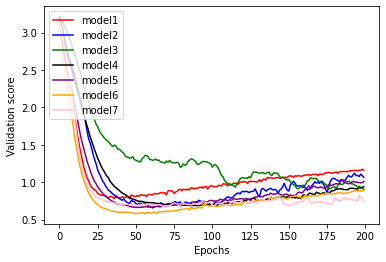

In [61]:
plt.plot(fit1.history['val_loss'], 'r', 
         fit2.history['val_loss'], 'b',
         fit3.history['val_loss'], 'g',
         fit4.history['val_loss'], 'black',
         fit5.history['val_loss'], 'purple',
         fit6.history['val_loss'], 'orange',
         fit7.history['val_loss'], 'pink',)
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(['model1', 'model2', 'model3', 'model4', 'model5','model6', 'model7'], loc='upper left')

plt.show()

In [62]:
# accuracy
_, acc = model7.evaluate(X_test,y_test)
print("Accuracy: %.1f%%" % (100.0 * acc))

2/2 [==============================] - 0s 1ms/step - loss: 0.7446 - accuracy: 0.8250
Accuracy: 82.5%


In [66]:
# save best model

#model7.save('chatbot_model.h5', fit7)

In [23]:
from keras.models import load_model
model = load_model('chatbot_model.h5')

## Evaluating the model

### Plotting out training history

I chose model 7 for evaluation as is it has the highest accuracy

#### Model 7

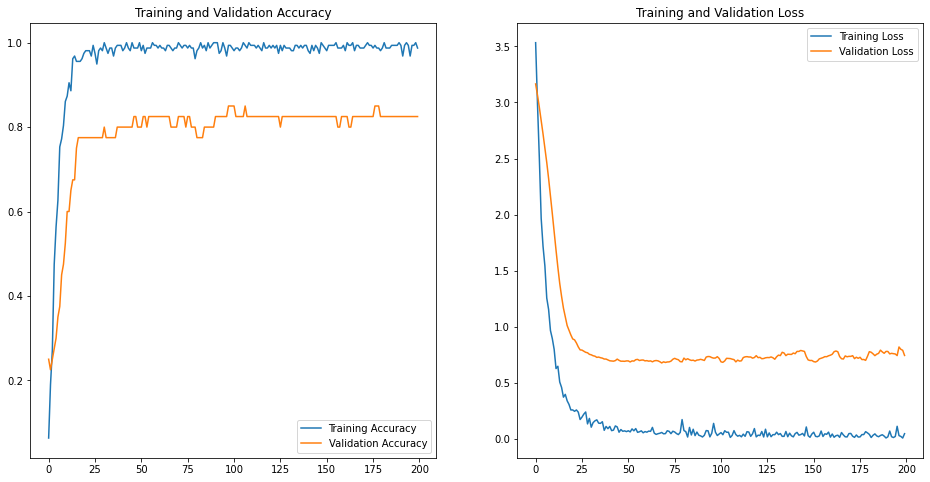

In [70]:
acc = fit7.history['accuracy']
val_acc = fit7.history['val_accuracy']
loss=fit7.history['loss']
val_loss=fit7.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluating on given test set

In [71]:
pred_results = []
for i in model.predict(X_test):
    pred_results.append(np.argmax(i))

In [72]:
actual_results = []
for i in y_test:
    actual_results.append(np.argmax(i))

In [73]:
answer = []
answer_incorrect = []

zip_object = zip(pred_results, actual_results)

for x, y in zip_object:
    if x == y:
        answer.append(x)
    else:
        answer_incorrect.append(x)

In [74]:
print("Predicted answers are : ", answer)
print("Unpredicted answers are : ", answer_incorrect)

Predicted answers are :  [10, 2, 18, 0, 6, 7, 23, 12, 11, 16, 0, 8, 2, 13, 6, 6, 17, 15, 2, 18, 13, 24, 5, 6, 23, 4, 4, 9, 6, 1, 7, 6, 6]
Unpredicted answers are :  [25, 22, 25, 15, 25, 0, 22]


In [75]:
# accuracy
_, acc = model.evaluate(X_test,y_test)
print("Accuracy: %.1f%%" % (100.0 * acc))

2/2 [==============================] - 0s 2ms/step - loss: 0.7446 - accuracy: 0.8250
Accuracy: 82.5%


### Prediction

In [24]:
def clean_up_sentence(sentence):
    
    stemmed_words = []
    tokenized_words = tokenize(sentence)
    for word in tokenized_words:
        stemmed_word = stem(word)
        stemmed_words.append(stemmed_word)

    return stemmed_words

In [25]:
def bag_of_words(sentence, training_sentences):
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(training_sentences)
    for w in sentence_words:
        for index, word in enumerate(training_sentences):
            if word == w:
                bag[index] = 1
    return(np.array(bag))

In [26]:
def predict_label(sentence, training_sentences, labels, model):
    bow = bag_of_words(sentence, training_sentences)
    res = model.predict(np.array([bow]))[0]
    
    error_treshold = 0.25
    
    for i,r, in enumerate(res):
        if r > error_treshold:
            results = [[i,r]]
    # sort by strength of probability   
    results.sort(key=lambda x: x[1], reverse=True)
   
    return_list = []
   
    for r in results:
        return_list.append({"intent": labels[r[0]], "probability": str(r[1])})
    return return_list
                           

In [27]:
test1 = predict_label('Where can I find the restaurant?',training_sentences, labels, model )
print(test1)

[{'intent': 'order', 'probability': '0.42014423'}]


In [28]:
test2 = predict_label('Which dishes are vegetarian?', training_sentences, labels, model)
print(test2)

[{'intent': 'vegetarianitems', 'probability': '1.0'}]


In [29]:
test3 = predict_label('Do you have rice dishes?', training_sentences, labels, model)
print(test3)

[{'intent': 'riceitems', 'probability': '0.9999976'}]


In [30]:
test4 = predict_label('Can you give me the menu?', training_sentences, labels, model)
print(test4)

[{'intent': 'specialitiesitems', 'probability': '0.782584'}]


In [31]:
def get_response(ints, ints_json, text):
    prob = ints[0]['probability']
    tag = ints[0]['intent']
    list_ints = ints_json['intents']
    
    
    if float(prob) > 0.55:
        for i in list_ints:
            if (i['tag'] == 'order'):
                getOrderedFood(text)
                status = getOrderStatus()
                price = getTotalPrice()
                result = f"{status} \n The total amount is {price} euro."
            elif(i['tag']== tag):
                result = random.choice(i['responses'])
                break
    else:
        result = 'I do not understand, please rephrase your sentence.'
    
    return result

In [32]:
def bot_response(text):
    ints = predict_label(text, training_sentences, labels, model)
    res = get_response(ints, intents, text)
    
    return res

### Order calculator

In [33]:
# menu of the restaurant

# this is the dictionary that consists the menu
menu_restaurant = {
    "champignons met bamboesoep": 3.9,
    "tomatensoep": 3.9,
    "kippenleversoep met groenten": 4.5,
    "pikante soep": 4.5,
    "chinese champignonsoep": 4.5,
    "thailandse soep": 5.5,
    "aspergesoep met krab": 5.5,
    "haaievinnensoep": 5.5,
    "kippensoep": 4.5,
    "wan tan soep": 5.5,
    "loempia met kip": 5.5,
    "loempia met garnalen": 5.7,
    "loempia met krab": 6,
    "kippensaté": 7.0,
    "kroepoek": 3.9,
    "kippenfilet met diverse groenten": 14,
    "kippenfilet met currysaus": 14,
    "gefrituurde kippenblokjes met zoetzure saus": 14,
    "nasi goreng special": 14.5,
    "nasi goreng met kip": 13,
    "nasi goreng met varkensvlees": 13,
    "nasi goreng met chinese garnalen": 17,
    "nasi goreng met krab": 17,
    "nasi goreng met kleine garnalen": 14.5,
    "rundsvlees met diverse groenten": 14.5,
    "varkensvlees met diverse groenten": 14,
    "babi pangang": 14.5,
    "chop choy special": 14.5,
    "chop choy met kip": 13,
    "chop choy met varkensvlees": 13,
    "chop choy met chinese garnalen": 17,
    "bami goreng special": 14.5,
    "bami goreng met kip": 13,
    "bami goreng met varkensvlees": 13,
    "bami goreng met chinese garnalen": 17,
    "fijne bami": 14.5,
    "rundsvlees op ijzeren plaat": 17,
    "kippenfilet op ijzeren plaat": 16,
    "gambas in curryroomsaus": 21,
}

# variables for order
dictFoodAmount = {}
ordered_food = []

# list for matching menu for displaying dish and price
menu = ["champignons met bamboesoep", "tomatensoep", "kippenleversoep met groenten", "pikante soep", "chinese champignonsoep","thailandse soep",
        "aspergesoep met krab", "haaievinnensoep", "kippensoep", "wan tan soep", "loempia met kip", "loempia met garnalen", "loempia met krab",
        "kippensaté", "kroepoek", "kippenfilet met diverse groenten", "kippenfilet met currysaus", "gefrituurde kippenblokjes met zoetzure saus",
        "nasi goreng special", "nasi goreng met kip", "nasi goreng met varkensvlees", "nasi goreng met chinese garnalen", "nasi goreng met krab",
        "nasi goreng met kleine garnalen", "nasi goreng met krab","nasi goreng met kleine garnalen", "rundsvlees met diverse groenten",
        "varkensvlees met diverse groenten","babi pangang", "chop choy special", "chop choy met kip", "chop choy met varkensvlees", 
        "chop choy met chinese garnalen", "bami goreng special", "bami goreng met kip", "bami goreng met varkensvlees", "bami goreng met chinese garnalen",
        "fijne bami", "rundsvlees op ijzeren plaat", "kippenfilet op ijzeren plaat", "gambas in curryroomsaus"
       ]

In [34]:
# functions for taking order and give total amount

def getAmountNumber(food):
    
    # give index position of food
    test = request.index(food)
    
    listChar = []
    # amount of char before food to check
    charsBeforeFood = 2

    while charsBeforeFood  > 0:
        
        numberString = test - charsBeforeFood 
      
        # add index of position that needs to be deducted in list
        listChar.append(numberString)
        charsBeforeFood  -= 1
         

    number = []
    for i in listChar:
        
        numberWithSpaces = request[i]
        
        number.append(numberWithSpaces)
    
    numberString = ''
    
    # give the amount of dishes
    number = numberString.join(number)
    
    return number

def getOrderedFood(request): 
    
    for food in menu:
        if request.__contains__(food):
        
            amount = getAmountNumber(food)
            dictFoodAmount[food] = amount
        
            ordered_food.append(food)
        
    return ordered_food

def getOrderStatus():
    
    answer = "Your order is: "
    
    for dish, amount in dictFoodAmount.items():
        answer += "\n - " + str(amount) + ' x ' + dish 
        
    return answer

def getTotalPrice():
    
    totalPrice = 0

    for dish in ordered_food:
        for item, price in menu_restaurant.items():
            if dish == item:
                amount = dictFoodAmount[dish]
                totalPrice += price * int(amount)
                
    return totalPrice


In [36]:
# running the chatbot
name = input('Enter your name: ')

print(f'Hi {name}, welcome to restaurant Taiwan chatbot service! Let me know how I can help you.')

while True:
    request = input(name+':')
    if request=="Bye" or request == 'bye':
        dictFoodAmount = {}
        ordered_food = []
        print('Bot: Bye')
        break
    else:
        response = bot_response(request)
        print('Bot:', response)
        
        if response.__contains__('total amount'):
            answerOrder = input('Would you like to confirm the order? (yes/no)')
            if answerOrder.lower() == 'yes':
                print('You order is confirmed and in process. More details will be send by email.')
                dictFoodAmount = {}
                ordered_food = []
            else:
                print('Your order is cancelled.')
                dictFoodAmount = {}
                ordered_food = []

Enter your name: Benny
Hi Benny, welcome to restaurant Taiwan chatbot service! Let me know how I can help you.
Benny:What are the opening hours?
Bot: The restaurant is open from Monday-Saturday from 12pm-2pm and 5pm-11pm, Sunday and public holidays from 12pm-11pm. Our closing day is Wednesday.
Benny:where is the restaurant?
Bot: The address of the restaurant is Oude Steenweg 65, 2530 Boechout. Public transport is convenient as it is only a 5min walk.
Benny:which dishes are vegetarian?
Bot: Here is a list of the vegetarian dishes:

  - loempia natuur: 5.5 euro,
 - nasi goreng natuur: 13 euro,
 - bami goreng natuur,
 - chop choy natuur: 13 euro
Benny:can you tell me more about the spicy dishes?
Bot: Here is a list of the spicy dishes:

 - pikante soep: 4.5 euro,
 - thailandse soep: 5.5 euro,
 - kippenfilet met currysaus: 14 euro,
 - gamba's in curryroomsaus: 21 euro,
 - vlees op z'n sechuan: 15 euro,
 - tongfilet in curryroomsaus: 20 euro,
 - 1/2 eend met ananas en currysaus: 17 euro
Ben

#### menu to choose from

- champignons met bamboesoep
- tomatensoep
- kippenleversoep met groenten
- pikante soep
- chinese champignonsoep
- thailandse soep
- aspergesoep met krab
- haaievinnensoep
- kippensoep
- wan tan soep
- loempia met kip
- loempia met garnalen
- loempia met krab
- kippensaté
- kroepoek
- kippenfilet met diverse groenten
- kippenfilet met currysaus
- gefrituurde kippenblokjes met zoetzure saus
- nasi goreng special
- nasi goreng met kip
- nasi goreng met varkensvlees
- nasi goreng met chinese garnalen
- nasi goreng met krab
- nasi goreng met kleine garnalen
- nasi goreng met krab
- nasi goreng met kleine garnalen
- rundsvlees met diverse groenten
- varkensvlees met diverse groenten
- babi pangang
- chop choy special
- chop choy met kip
- chop choy met varkensvlees 
- chop choy met chinese garnalen
- bami goreng special
- bami goreng met kip
- bami goreng met varkensvlees
- bami goreng met chinese garnalen
- fijne bami
- rundsvlees op ijzeren plaat
- kippenfilet op ijzeren plaat
- gambas in curryroomsaus
      